![gym](gym.jpg)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading the first dataset, 'workout.csv
df_workout = pd.read_csv('data/workout.csv')

In [4]:
# viewing the workout data
df_workout.head(5)

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [5]:
# extracting the years from the month
df_workout['year'] = df_workout.loc[:,'month'].str[0:4]

In [6]:
# group the dataframe by the year and mean of mean of popularity index for each year
df_workout_groubyYear = df_workout.groupby(by='year')['workout_worldwide'].mean().reset_index()

In [7]:
# saving the year of peak interest as year_str
# - and saving the answers as year_str as required
year_str = df_workout_groubyYear[df_workout_groubyYear['workout_worldwide'] == df_workout_groubyYear['workout_worldwide'].max()].reset_index(drop=True).loc[0,'year']

In [8]:
# changing the type of 'year' column from object to integer
df_workout_groubyYear["year"] = df_workout_groubyYear.loc[:,"year"].astype("int32")

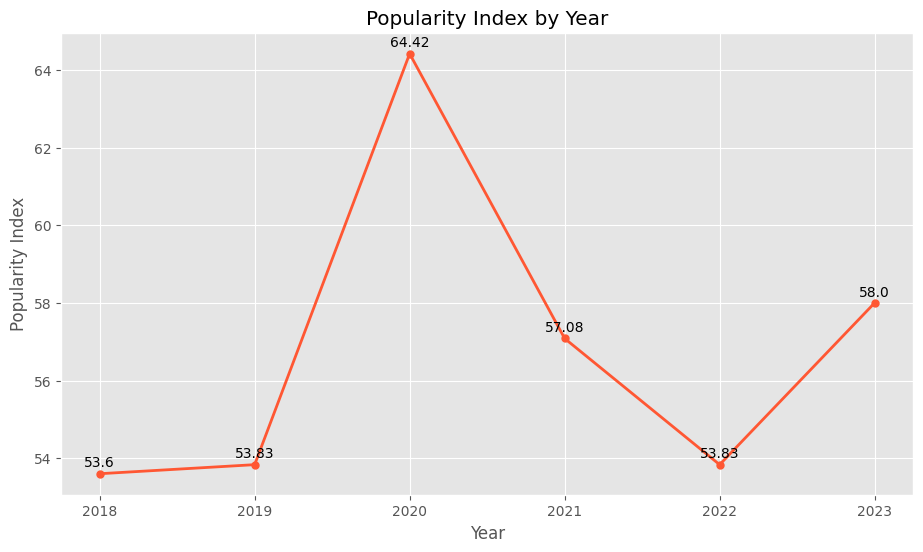

In [9]:
# creating line graph for the each year's index
plt.style.use('ggplot')
plt.figure(figsize=(11,6))

plt.plot("year","workout_worldwide", data=df_workout_groubyYear,
         color="#ff5733",
         linewidth=2,
         marker="o",
         markersize=5)

plt.title("Popularity Index by Year")
plt.xlabel("Year")
plt.ylabel("Popularity Index")

# annotating the markers
for i in range(len(df_workout_groubyYear)):
    plt.annotate(f"{round(df_workout_groubyYear["workout_worldwide"][i],2)}",
                 (df_workout_groubyYear["year"][i],df_workout_groubyYear["workout_worldwide"][i]),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center')

In [10]:
# loading the second csv file 'three_keywords.csv'
df_three_keywords = pd.read_csv(r'data\three_keywords.csv')

In [11]:
df_three_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [12]:
# extracting the year from the month column
df_three_keywords["year"] = df_three_keywords.loc[:,'month'].str[0:4]

In [13]:
df_three_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide,year
0,2018-03,12,16,10,2018
1,2018-04,12,18,10,2018
2,2018-05,13,16,9,2018
3,2018-06,12,17,9,2018
4,2018-07,12,17,9,2018


In [14]:
# grouping the popularity index categories by year
df_three_keywords_groupbyYear = df_three_keywords.groupby(by='year')[["home_workout_worldwide","gym_workout_worldwide","home_gym_worldwide"]].mean().reset_index()

In [15]:
df_three_keywords_groupbyYear

,year,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018,11.700000,16.100000,9.400000
1,2019,12.333333,16.416667,9.833333
2,2020,27.250000,14.250000,19.916667
3,2021,17.166667,14.666667,15.916667
4,2022,13.333333,18.333333,12.666667
5,2023,14.666667,20.666667,13.000000


In [16]:
# creating function to compare the index of popularity for any specified particular year
def popular_highest_index(df,year):
    year_to_compare = df[df['year']==str(year)]
    if (year_to_compare.iloc[0,1]>year_to_compare.iloc[0,2]) & (year_to_compare.iloc[0,1]>year_to_compare.iloc[0,3]):
        return "home_workout_worldwide"
    elif (year_to_compare.iloc[0,2]>year_to_compare.iloc[0,1]) & (year_to_compare.iloc[0,2]>year_to_compare.iloc[0,3]):
        return "gym_workout_worldwide"
    else:
        return "home_gym_worldwide"

In [17]:
# inspecting the most popular during covid pandemic
peak_covid = popular_highest_index(df_three_keywords_groupbyYear,2020)
peak_covid

'home_workout_worldwide'

In [18]:
# inspecting the most popular during latest year
current = popular_highest_index(df_three_keywords_groupbyYear,2023)
current

'gym_workout_worldwide'

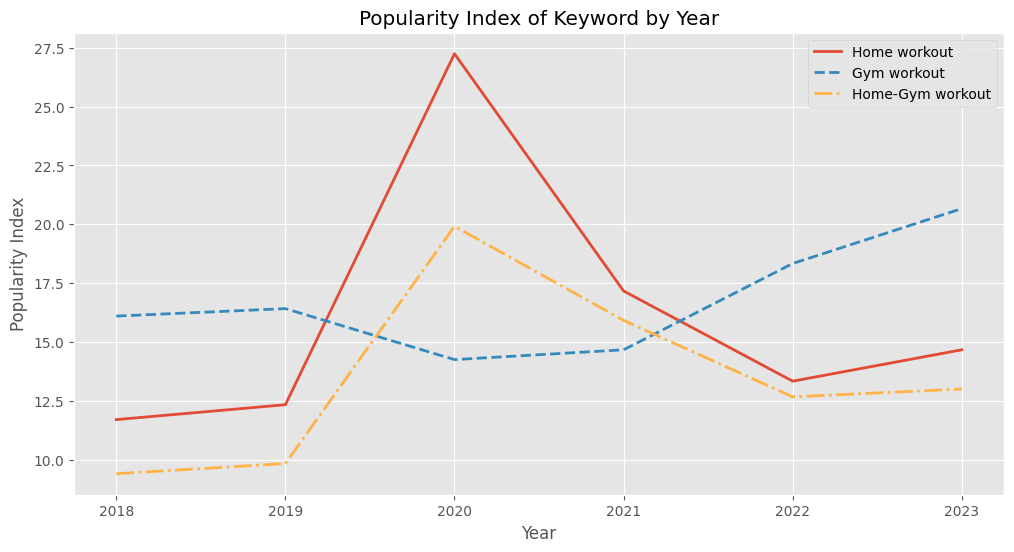

In [30]:
# visualizing each categories by year
plt.figure(figsize=(12,6))

plt.plot("year", "home_workout_worldwide", data=df_three_keywords_groupbyYear,
         linestyle='solid',
         label="Home workout",
         linewidth=2)
plt.plot("year", "gym_workout_worldwide", data=df_three_keywords_groupbyYear,
         linestyle='dashed',
         label="Gym workout",
         linewidth=2)
plt.plot("year", "home_gym_worldwide", data=df_three_keywords_groupbyYear,
         linestyle='dashdot',
         linewidth=2,
         color="#ffb347",
         label="Home-Gym workout")

plt.title("Popularity Index of Keyword by Year")
plt.ylabel("Popularity Index")
plt.xlabel("Year")
plt.legend()

In [20]:
# loading the third dataset, 'workout_geo.csv'
df_workout_geo = pd.read_csv(r"data\workout_geo.csv")

In [21]:
# comparing US, Australia, or Japan having the highest interest for workouts
selected_geo = df_workout_geo[df_workout_geo["country"].isin(["United States","Australia","Japan"])]

top_countries = selected_geo[selected_geo['workout_2018_2023']==selected_geo['workout_2018_2023'].max()].iloc[0,0]
top_countries

'United States'

[Text(1, 0, '1.0'), Text(1, 0, '77.0'), Text(1, 0, '100.0')]

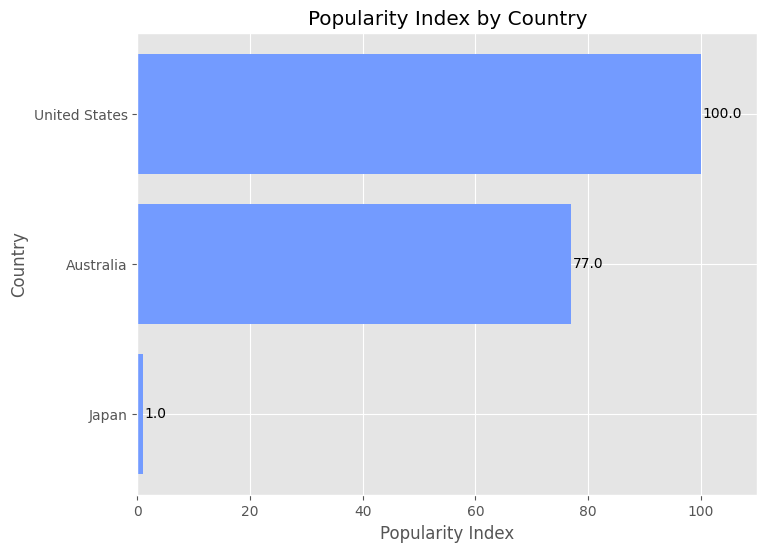

In [22]:
# comparing United States, Australia, and Japan using bargraph

selected_geo = selected_geo.sort_values(by="workout_2018_2023")

plt.figure(figsize=(8,6))
ax = plt.barh("country",
              "workout_2018_2023",
              data=selected_geo,
              color="#739BFF")

plt.title("Popularity Index by Country")
plt.xlabel("Popularity Index")
plt.ylabel("Country")
plt.xlim((0,110))

plt.bar_label(ax, 
              labels=selected_geo["workout_2018_2023"],
              label_type='edge',
              padding=1)



In [23]:
# loading the fourth dataset, 'three_keywords_geo.csv'
df_three_keywords_geo = pd.read_csv(r'data\three_keywords_geo.csv')
df_three_keywords_geo.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [24]:
# comparing home workout index for Philipines and Malaysia
ph_malay = (df_three_keywords_geo[(df_three_keywords_geo["Country"] == "Philippines") | (df_three_keywords_geo["Country"] == "Malaysia")].reset_index(drop=True))
ph_malay

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Philippines,52.0,38.0,10.0
1,Malaysia,47.0,38.0,15.0


In [25]:
home_workout_geo = ph_malay[ph_malay["home_workout_2018_2023"]==(ph_malay["home_workout_2018_2023"].max())].iloc[0,0]
home_workout_geo

'Philippines'

[Text(0, 1.5, '52.0'), Text(0, 1.5, '47.0')]

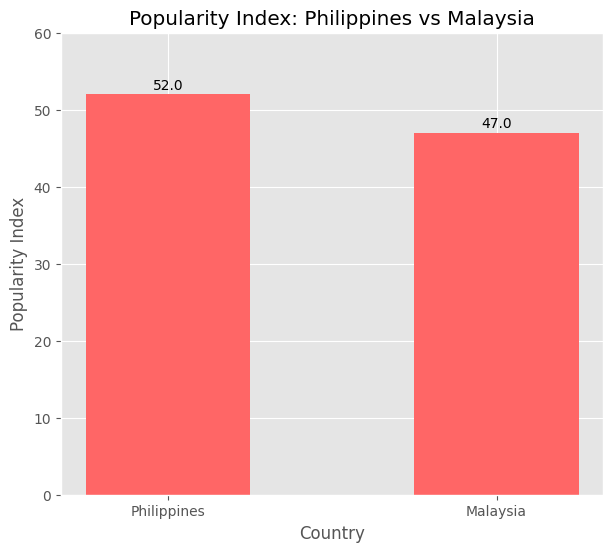

In [26]:
# visualizing the home workout index of Philippines vs Malaysia

plt.figure(figsize=(7,6))
ax = plt.bar("Country", "home_workout_2018_2023", data=ph_malay,
             width=0.5,
             align='center',
             color="#ff6666")

plt.title("Popularity Index: Philippines vs Malaysia")
plt.xlabel("Country")
plt.ylabel("Popularity Index")
plt.ylim((0,60))

plt.bar_label(ax,
              ph_malay["home_workout_2018_2023"],
              label_type='edge',
              padding=1.5)